# Spectral clustering
for determining the successfulness of object feature representation in identifying various objects

In [55]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

np.set_printoptions(precision=2, formatter={'float_kind': "{:.3f}".format})

### Loading object features

In [56]:
### Object features
block_features = np.array([
    [0.025, 0.05, 0.05, 0., 0., 0., 0., 0., 0.],
    [0.03, 0.025, 0.045, 0., 0., 0., 0., 0., 0.],
    [0.05, 0.025, 0.04, 0., 0., 0., 0., 0., 0.],
])

cylinder_features = np.array([
    [0.04, 0.04, 0.05, 950.21606561, 14540.28434464, 950.21606561, 14540.28434464, 950.21606561, 14540.28434464],
    [0.045, 0.045, 0.035, 750.78800246, 11488.6197291, 750.78800246, 11488.6197291, 750.78800246, 11488.6197291],
    [0.034, 0.034, 0.045, 1315.17794549, 20124.96103064, 1315.17794549, 20124.96103064, 1315.17794549, 20124.96103064]
])

bottle_features = np.array([
    [0.06, 0.04, 0.04, 43195.64459266, 114198.0441697 , 45229.93706864, 135651.61794731, 75768.06626518,  83802.00991944],
    [0.04, 0.06, 0.06, 68993.34322089, 220902.86884084, 75354.47923164, 239160.99530455, 109695.41304924, 147938.06047763],
    [0.04, 0.06, 0.04, 61744.75459905, 168925.8805044 , 68143.84372052, 148775.07141178, 73102.67367022, 102953.40831915]
])

object_names = {0: 'cylinder', 1: 'block', 2: 'bottle'}

### Feature transformation

Concatenating features together

In [57]:
objects = (block_features, cylinder_features, bottle_features)
features = np.concatenate(objects)
labels = np.array([1, 1, 1, 0, 0, 0, 2, 2, 2])
features

array([[0.025, 0.050, 0.050, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.030, 0.025, 0.045, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.050, 0.025, 0.040, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.040, 0.040, 0.050, 950.216, 14540.284, 950.216, 14540.284,
        950.216, 14540.284],
       [0.045, 0.045, 0.035, 750.788, 11488.620, 750.788, 11488.620,
        750.788, 11488.620],
       [0.034, 0.034, 0.045, 1315.178, 20124.961, 1315.178, 20124.961,
        1315.178, 20124.961],
       [0.060, 0.040, 0.040, 43195.645, 114198.044, 45229.937,
        135651.618, 75768.066, 83802.010],
       [0.040, 0.060, 0.060, 68993.343, 220902.869, 75354.479,
        239160.995, 109695.413, 147938.060],
       [0.040, 0.060, 0.040, 61744.755, 168925.881, 68143.844,
        148775.071, 73102.674, 102953.408]])

Standardize the data

In [58]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
features

array([[-1.558, 0.639, 0.707, -0.707, -0.765, -0.702, -0.760, -0.700,
        -0.817],
       [-1.054, -1.386, 0.000, -0.707, -0.765, -0.702, -0.760, -0.700,
        -0.817],
       [0.964, -1.386, -0.707, -0.707, -0.765, -0.702, -0.760, -0.700,
        -0.817],
       [-0.045, -0.171, 0.707, -0.673, -0.583, -0.671, -0.586, -0.677,
        -0.536],
       [0.460, 0.234, -1.414, -0.680, -0.621, -0.677, -0.622, -0.682,
        -0.595],
       [-0.650, -0.657, 0.000, -0.660, -0.513, -0.659, -0.519, -0.668,
        -0.428],
       [1.973, -0.171, -0.707, 0.846, 0.664, 0.789, 0.869, 1.125, 0.801],
       [-0.045, 1.449, 2.121, 1.774, 1.999, 1.781, 2.112, 1.942, 2.039],
       [-0.045, 1.449, -0.707, 1.513, 1.349, 1.544, 1.026, 1.061, 1.171]])

### Spectral clustering

In [59]:
clusters = 3
# kmeans = KMeans(n_clusters=clusters, n_init=9, random_state=0)
# kmeans.fit(features)
# labels = kmeans.labels_
# labels

# spectral = SpectralClustering(n_clusters=clusters, affinity='nearest_neighbors', n_neighbors=3, random_state=0)
# spectral.fit(features)
# labels = spectral.labels_
# labels

In [60]:
# Create a scatter plot of feature 1 against feature 2
# fig, ax = plt.subplots()
# scatter = ax.scatter(features[:, 3], features[:, 4], c=labels, cmap='viridis')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Scatter plot of Feature 1 vs Feature 2')

# # Add labels for each point
# # for i, label in enumerate(labels):
# #     ax.annotate(str(object_names[label]), (features[i, 0], features[i, 1]))

# plt.show()

### PCA

In [61]:
def pca(data, k):
    pca = PCA(n_components=k)
    pca.fit(data)
    print(f"Variance captured: {pca.explained_variance_ratio_}")
    return pca.transform(data)

Variance captured: [0.746 0.169]%


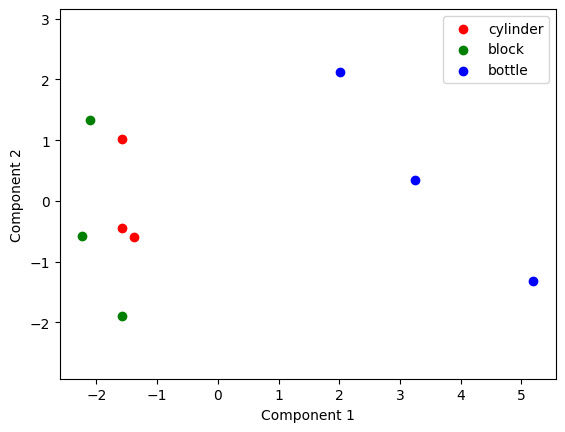

In [68]:
### Plot 2-feature PCA results
pca2d = pca(features, k=2)

colors = ['r', 'g', 'b']
for i, c in zip(np.unique(labels), colors):
    plt.scatter(pca2d[labels == i, 0], pca2d[labels == i, 1], c=c, label=object_names[i])

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

Variance captured: [0.746 0.169 0.059]%


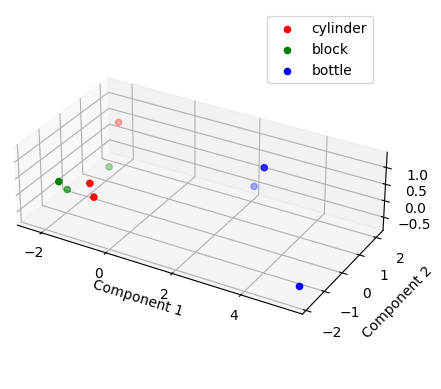

In [69]:
### Plot 3-feature PCA results
pca3d = pca(features, k=3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
for i, c in zip(np.unique(labels), colors):
    ax.scatter(pca3d[labels == i, 0], pca3d[labels == i, 1], pca3d[labels == i, 2], c=c, label=object_names[i])

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_aspect('equal', 'box')
ax.legend()
plt.show()

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


clf = LogisticRegression()
clf.fit(features, labels)
ypred = clf.predict(features)

accuracy = accuracy_score(labels, ypred)
accuracy

0.8888888888888888